<a href="https://colab.research.google.com/github/stephie21/Kmeans/blob/main/08_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8 Deep Learning

8.1 Use a pre-trained ResNet50 and VGG16 on Keras to implement an inference of the test image in this directory!

* Example: <https://keras.io/applications/>


8.2 Use a pre-trained ResNet50 and VGG16 on PyTorch to implement an inference of the test image in this directory!

* Example: http://pytorch.org/docs/master/torchvision/models.html

8.3 Compare the inference times of both networks and frameworks!

8.4 Find two positive and negative sample images that are correctly/incorrectly classified!

8.5 Compare the inference time for Tensorflow/Keras on GPUs and CPUs!


In [2]:
import os, sys
import tensorflow as tf
os.environ["KERAS_BACKEND"]="tensorflow"
import keras
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
tf.__version__

'2.18.0'

In [3]:
!wget https://raw.githubusercontent.com/scalable-infrastructure/exercise-2025/master/07_DeepLearning/car.jpg

--2025-04-03 14:06:49--  https://raw.githubusercontent.com/scalable-infrastructure/exercise-2025/master/07_DeepLearning/car.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60742 (59K) [image/jpeg]
Saving to: ‘car.jpg’

car.jpg             100%[===================>]  59.32K  --.-KB/s    in 0.01s   

2025-04-03 14:06:50 (5.04 MB/s) - ‘car.jpg’ saved [60742/60742]



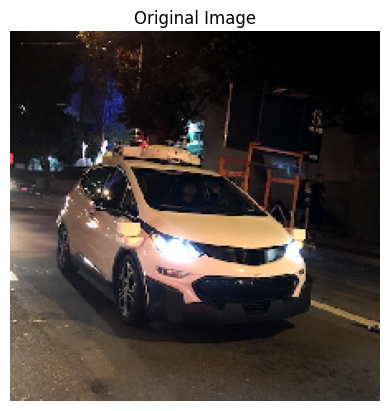

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
ResNet50 Top-1: minivan (40.98%)
VGG16 Top-1: minivan (76.05%)
ResNet50 Time: 2.9540s
VGG16 Time: 1.3376s

Top-5 predictions (ResNet50):
1. minivan (40.98%)
2. cab (20.74%)
3. limousine (13.90%)
4. beach_wagon (12.42%)
5. car_wheel (6.36%)


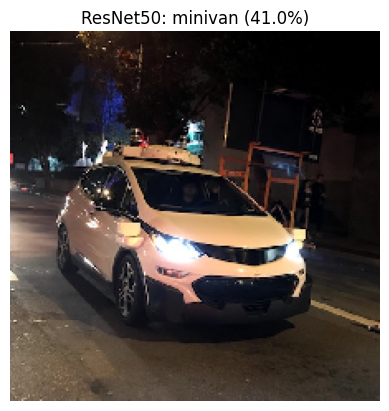

In [10]:
import numpy as np
from tensorflow.keras.applications import resnet50, vgg16
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import time

# Bildpfad
img_path = 'car.jpg'

# Bild laden und vorbereiten für Anzeige
img = image.load_img(img_path, target_size=(224, 224))
img_for_model = image.img_to_array(img)
x = np.expand_dims(img_for_model, axis=0)

# Bild anzeigen
plt.imshow(img)
plt.axis('off')
plt.title("Original Image")
plt.show()

# Preprocessing für beide Modelle
x_resnet = resnet50.preprocess_input(x.copy())
x_vgg = vgg16.preprocess_input(x.copy())

# Modelle laden
model_resnet = resnet50.ResNet50(weights='imagenet')
model_vgg = vgg16.VGG16(weights='imagenet')

# Inferenz ResNet
start = time.time()
preds_resnet = model_resnet.predict(x_resnet)
resnet_time = time.time() - start

# Inferenz VGG
start = time.time()
preds_vgg = model_vgg.predict(x_vgg)
vgg_time = time.time() - start

# Top-1 anzeigen
top1_resnet = resnet50.decode_predictions(preds_resnet, top=1)[0][0]
top1_vgg = vgg16.decode_predictions(preds_vgg, top=1)[0][0]

print(f"ResNet50 Top-1: {top1_resnet[1]} ({top1_resnet[2]*100:.2f}%)")
print(f"VGG16 Top-1: {top1_vgg[1]} ({top1_vgg[2]*100:.2f}%)")
print(f"ResNet50 Time: {resnet_time:.4f}s")
print(f"VGG16 Time: {vgg_time:.4f}s")

# Optional: Top-5 ResNet anzeigen
print("\nTop-5 predictions (ResNet50):")
top5_resnet = resnet50.decode_predictions(preds_resnet, top=5)[0]
for i, (imagenet_id, label, score) in enumerate(top5_resnet):
    print(f"{i+1}. {label} ({score*100:.2f}%)")

# Bild mit Top-1 Vorhersage zeigen
plt.imshow(img)
plt.axis('off')
plt.title(f"ResNet50: {top1_resnet[1]} ({top1_resnet[2]*100:.1f}%)")
plt.show()
